# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [25]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [26]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [27]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        09:40:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.45)

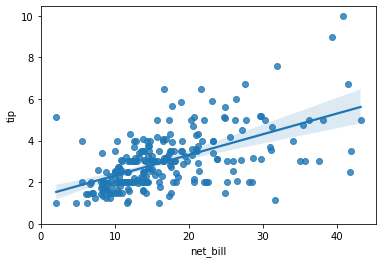

In [28]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips)

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [29]:
# Ajustar o modelo de regressão linear usando o smf
model = smf.ols('tip_pct ~ net_bill', data=tips[tips['tip_pct']<.5]).fit() #utilizando o filtro '<.5' para retirar outlier

# Obter os valores preditos pelo modelo
tips['tip_pct_pred'] = model.predict(tips['net_bill'])

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.31e-12
Time:                        09:40:35   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

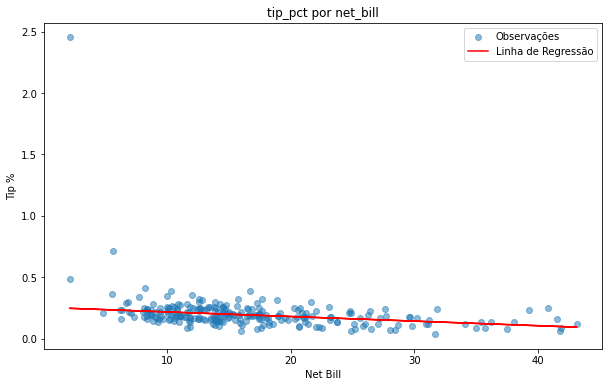

In [30]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], tips['tip_pct'], alpha=0.5, label='Observações')

# Plotar a linha de regressão
plt.plot(tips['net_bill'], tips['tip_pct_pred'], color='red', label='Linha de Regressão')

# Adicionar títulos e rótulos
plt.title('tip_pct por net_bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip %')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$'s?

In [31]:
# Obter os valores de R^2
r2_tip_pct = model.rsquared
r2_tip = reg.rsquared

print(f"R^2 do modelo com 'tip_pct' como variável dependente: {r2_tip_pct:.4f}")
print(f"R^2 do modelo com 'tip' como variável dependente: {r2_tip:.4f}")

R^2 do modelo com 'tip_pct' como variável dependente: 0.1895
R^2 do modelo com 'tip' como variável dependente: 0.3325


Graficamente, em um primeiro momento, a impressão é de que a variável 'tip_pct' apresenta menor variabilidade que a variável 'tip', e por isso 'net_bill' seria um bom preditor para a proporção da gorjeta. No entanto, ao analisar os valores de $R^2$ vimos que a situação na verdade é o oposto. Mesmo retirando outliers, a regressão da variável 'tip' apresentou um valor de R2 maior, o que significa que a relação entre a conta líquida e o valor da gorjeta é mais direta e significativa do que a porcentagem.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [37]:
# Ajustando o modelo de regressão
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Obtendo os valores preditos
pred_tip_pct = model_tip_pct.fittedvalues

# Calculando os valores preditos para 'tip'
pred_tip = pred_tip_pct * tips['net_bill']

# Ajustando o modelo de regressão para 'tip'
model_tip = smf.ols('tip ~ net_bill', data=tips).fit()

# Calculando o R^2 para o modelo ajustado usando os valores preditos
model_tip_ajustado = smf.ols('tip ~ pred_tip', data=tips.assign(pred_tip=pred_tip)).fit()

# Obtendo o R^2 do modelo ajustado
r_squared_adjustado = model_tip_ajustado.rsquared

# Comparando os R^2
print(f"R^2 do modelo original para 'tip': {model_tip.rsquared:.4f}")
print(f"R^2 do modelo ajustado para 'tip' baseado em 'tip_pct': {r_squared_adjustado:.4f}")

R^2 do modelo original para 'tip': 0.3325
R^2 do modelo ajustado para 'tip' baseado em 'tip_pct': 0.1211


o $R^2$ do modelo original apresentou um valor maior que o ajustado de acordo com a previsão.